First thing we do is import relevant packages and then set global visualization styles.

In [1]:
# importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# setting global visualization styles
sns.set_style("white")
sns.set_palette('Blues')
sns.set(rc={'figure.figsize':(12,7)})

 All of the json files are read into their own dataframe using pandas read_json, put into a list, and then combined into a single dataframe called “listings”. 

In [2]:
# reading all scraped json files (each a respective price range containing >=300 listings) into their own respective dfs
d60 = pd.read_json(r'C:\Users\bdmul\Documents\Airbnb_scraper\Scraped Data\deauville_60.json')
d60_75 = pd.read_json(r'C:\Users\bdmul\Documents\Airbnb_scraper\Scraped Data\deauville_60_75.json')
d75_93 = pd.read_json(r'C:\Users\bdmul\Documents\Airbnb_scraper\Scraped Data\deauville_75_93.json')
d93_115 = pd.read_json(r'C:\Users\bdmul\Documents\Airbnb_scraper\Scraped Data\deauville_93_115.json')
d115_140 = pd.read_json(r'C:\Users\bdmul\Documents\Airbnb_scraper\Scraped Data\deauville_115_140.json')
d140_180 = pd.read_json(r'C:\Users\bdmul\Documents\Airbnb_scraper\Scraped Data\deauville_140_180.json')
d180_290 = pd.read_json(r'C:\Users\bdmul\Documents\Airbnb_scraper\Scraped Data\deauville_180_290.json')
d290 = pd.read_json(r'C:\Users\bdmul\Documents\Airbnb_scraper\Scraped Data\deauville_290.json')

In [3]:
# combining all dataframes into one
dfs = [d60, d60_75, d75_93, d93_115, d115_140, d140_180, d180_290, d290]
listings = pd.concat([d60, d60_75, d75_93, d93_115, d115_140, d140_180, d180_290, d290]).drop_duplicates().reset_index(drop=True)
listings.shape

(2209, 9)

### Now the Cleaning Begins ###

We start with the price variable by using regular expressions to remove the € and change the type to an integer. 

In [4]:
# removing € from the 'price' field and changing type to integer to facilitate manipulation
listings['price'] = listings['price'].replace('[\€\,\.]', '', regex=True).astype(int)

listings.head(5)

name  \
0                                          Studio   
1                      Les Marinas for 2 persons.   
2  Mini duplex aux Marinas de Deauville - vue mer   
3                       Studio Deauville Rousseau   
4                    Charmant appartement vue mer   

                                      header  \
0            Entire rental unit in Deauville   
1  Entire rental unit in Deauville-Trouville   
2              Entire apartment in Deauville   
3            Entire rental unit in Deauville   
4      Entire apartment in Blonville-sur-Mer   

                                                link    guests   bedrooms  \
0  /rooms/7487350?check_in=2021-12-23&check_out=2...  2 guests  1 bedroom   
1  /rooms/17972276?check_in=2021-12-23&check_out=...  2 guests  1 bedroom   
2  /rooms/19540384?check_in=2021-12-23&check_out=...  2 guests  1 bedroom   
3  /rooms/44378027?check_in=2021-12-23&check_out=...  2 guests     Studio   
4  /rooms/26489890?check_in=2021-12-23&check_out=...  4 guests  1 bedroom   

    beds   bathrooms  price  rating  
0  1 bed  1 bathroom     48    4.54  
1  1 bed  1 bathroom     56    4.53  
2  1 bed  1 bathroom     57    4.53  
3  1 bed  1 bathroom     56    5.00  
4  1 bed  1 bathroom     58    4.89

Then we move on to the bedrooms variable where we replace “Studio” with 0 and remove “bedrooms*” using regular expressions and changing the type to an integer. 

In [5]:
# replacing 'Studio' with '0' for easier manipulation
listings['bedrooms'] = listings['bedrooms'].replace('Studio', '0')

# changing bedrooms type to integer to facilitate manipulation
listings['bedrooms'] = listings['bedrooms'].replace(' bedrooms*', '', regex=True).astype(int)

# viewing the counts of the indivdual values in 'bedrooms' variable
listings['bedrooms'].value_counts()

1    942
2    458
0    395
3    228
4    113
5     40
6     19
7     10
8      4
Name: bedrooms, dtype: int64

### Establishing our goal ###
Let's say we are a property manager and we are interested in knowing how to price our rentals in Deauville, France. 

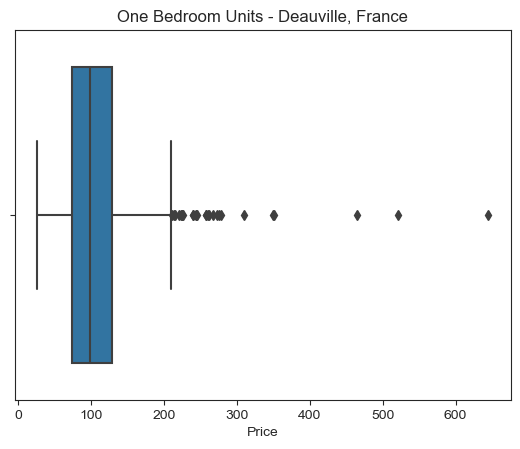

In [14]:
# boxplot to get an intial view of one bedroom price range
sns.boxplot(data=listings[listings['bedrooms'] == 1], x='price')
sns.set_style("white")
sns.set_style("ticks")

plt.xlabel('Price')
plt.title('One Bedroom Units - Deauville, France')

plt.savefig("One_Bedroom_Price_Boxplot.jpeg")
plt.show()

In [7]:
# creating a one_br dataframe
one_br = listings[listings["bedrooms"] == 1]

# inspecting one_br price > 300
one_br[one_br['price'] > 300]

name  \
2165                LE COEUR DE DEAUVILLE (COLAS)   
2168    DEAUVILLE - SEA FRONT - JARDIN & TERRASSE   
2197                           Together,  10 lits   
2201                            Together,  7 lits   
2204  Le Green de Deauville, Résidence du Golf***   
2206                            Together, 12 lits   

                               header  \
2165    Entire apartment in Deauville   
2168  Entire rental unit in Deauville   
2197          Hotel room in Deauville   
2201          Hotel room in Deauville   
2204    Entire apartment in Deauville   
2206          Hotel room in Deauville   

                                                   link     guests  bedrooms  \
2165  /rooms/26982628?check_in=2021-12-23&check_out=...   5 guests         1   
2168  /rooms/50049402?check_in=2021-12-23&check_out=...   4 guests         1   
2197  /rooms/43101918?check_in=2021-12-23&check_out=...  10 guests         1   
2201  /rooms/43101360?check_in=2021-12-23&check_out=...   7 guests         1   
2204  /rooms/50398707?check_in=2021-12-23&check_out=...   5 guests         1   
2206  /rooms/43101999?check_in=2021-12-23&check_out=...  12 guests         1   

        beds          bathrooms  price  rating  
2165  4 beds         1 bathroom    350    4.71  
2168  2 beds         1 bathroom    351     NaN  
2197  5 beds         1 bathroom    521     NaN  
2201  4 beds  1 shared bathroom    465     NaN  
2204  3 beds         1 bathroom    310     NaN  
2206  6 beds  1 shared bathroom    645     NaN

In [8]:
# dropping one bedroom price outliers
one_br = one_br.drop([2197, 2201, 2206])

In [9]:
# looking at the shape of dataframe
one_br.shape

(939, 9)

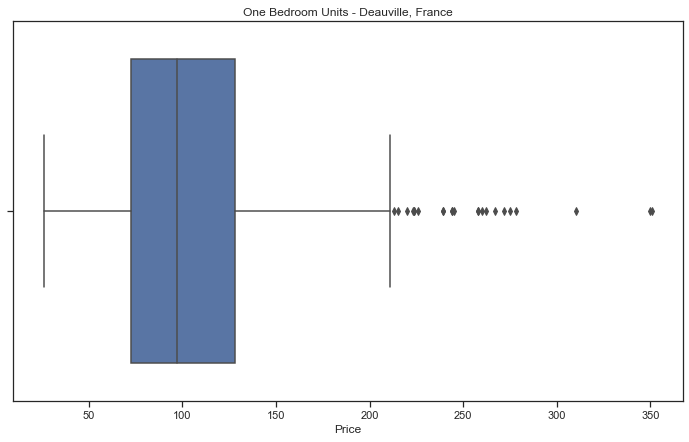

In [10]:
# boxplot to get an intial view of one bedroom price range
sns.boxplot(data=one_br[one_br['bedrooms'] == 1], x='price')


plt.xlabel('Price')
plt.title('One Bedroom Units - Deauville, France')


sns.set_style("white")
sns.set_style("ticks")
plt.savefig("One_Bedroom_Price_Boxplot_Cleaned.jpeg")
plt.show()

In [11]:
# finding one bedroom price quartiles
one_br_25 = np.percentile(one_br.price, 25)
one_br_50 = np.percentile(one_br.price, 50)
one_br_75 = np.percentile(one_br.price, 75)
# printing out values for the percentiles
print(f"The 25th percentile is equal to {one_br_25}.")
print(f"The 50th percentile (also known as the median) is equal to {one_br_50}.")
print(f"The 75th percentile is equal to {one_br_75}.")

The 25th percentile is equal to 72.5.
The 50th percentile (also known as the median) is equal to 97.0.
The 75th percentile is equal to 128.0.


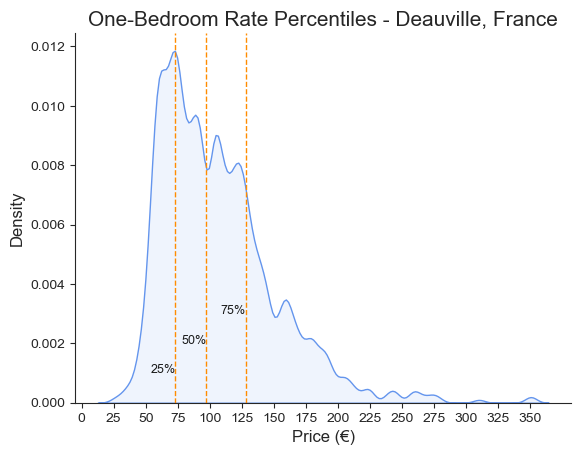

In [12]:
# creating a kdeplot with axis lines to represent percentiles

# setting styles
sns.reset_defaults()
sns.set_style("ticks")

# one bedroom kdeplot
sns.kdeplot(data=one_br, x='price', color='cornflowerblue', fill=True, alpha=0.1, bw_method=0.1)

# ax lines for percentiles
plt.axvline(one_br_50, color ='darkorange', linestyle='dashed', linewidth='1')
plt.axvline(one_br_75, color ='darkorange', linestyle='dashed', linewidth='1')
plt.axvline(one_br_25, color ='darkorange', linestyle='dashed', linewidth='1')

# title, axis labels, x ticks
plt.title('One-Bedroom Rate Percentiles - Deauville, France', fontsize=15)
plt.xlabel('Price (€)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.xticks([0, 25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 350])

# text for ax line percentiles
plt.annotate('25%', xy = (54, .001), color='k', fontsize=9)
plt.annotate('50%', xy = (78, .002), color = 'k', fontsize=9)
plt.annotate('75%', xy = (108, .003), color = 'k', fontsize=9)

# formatting, save jpeg, show
sns.despine(top=True)
plt.savefig("Nightly_Rate_Percentiles.jpg")
plt.show()